In [1]:
import pandas as pd

wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [6]:
data_input = wine.iloc[:,:-1]
data_target = wine.iloc[:,-1]
print(data_input.shape)
print(data_target.shape)

(6497, 3)
(6497,)


- 모델 데이터 분리 

In [8]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data_input, data_target, test_size=0.2, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(5197, 3) (1300, 3)
(5197,) (1300,)


- 모델 전처리

In [9]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled.shape, test_scaled.shape)

(5197, 3) (1300, 3)


In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.7808350971714451
0.7776923076923077


- 모델 계수 및 편향

In [12]:
lr.coef_, lr.intercept_

(array([[ 0.51270274,  1.6733911 , -0.68767781]]), array([1.81777902]))

- ### <span style= "color :red"> 결정 트리 알고리즘 </span>

In [13]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(train_scaled, train_target)
print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.996921300750433
0.8592307692307692


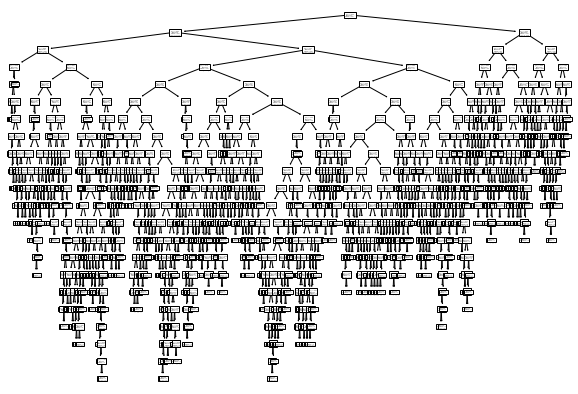

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

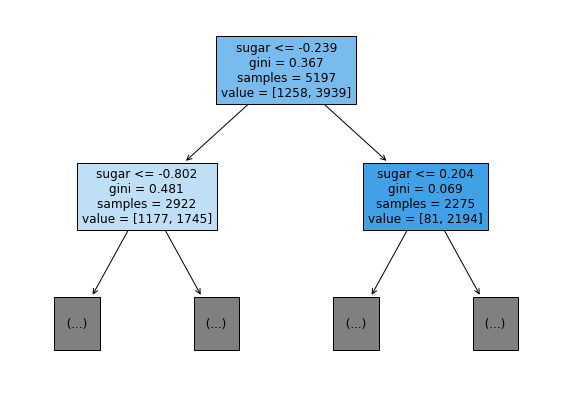

In [16]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()

- 전처리가 필요없는 결정 나무 ㅁㅎ댈

0.8454877814123533
0.8415384615384616


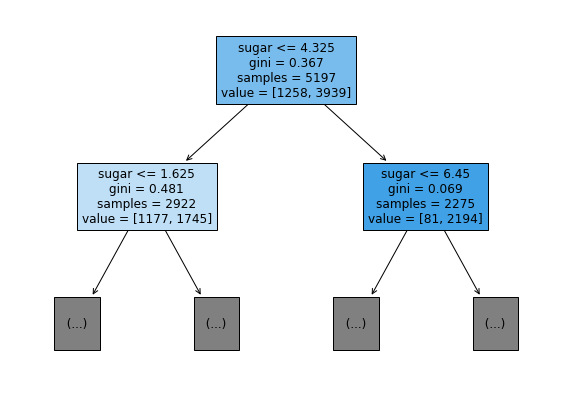

In [17]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol','sugar','pH'])
plt.show()